Apa itu Clustering dan Algoritma K-Prototypes

Clustering adalah proses pembagian objek-objek ke dalam beberapa kelompok (cluster) berdasarkan tingkat kemiripan antara satu objek dengan yang lain.

Terdapat beberapa algoritma untuk melakukan clustering ini. Salah satu yang populer adalah k-means.

K-means itu sendiri biasa nya hanya digunakan untuk data-data yang bersifat numerik. Sedangkan untuk yang bersifat kategorikal saja, kita bisa menggunakan k-modes.

Lalu bagaimana apabila di data kita terdapat gabungan kategorikal dan numerikal variabel? Jawabannya kita bisa menggunakan algoritma k-prototype yang merupakan gabungan dari k-means dan k-modes. Hal ini bisa di lakukan dengan menggunakan library k-modes yang di dalamnya terdapat modul kprototype.

In [7]:
!pip install kmodes

Mencari Jumlah Cluster yang Optimal

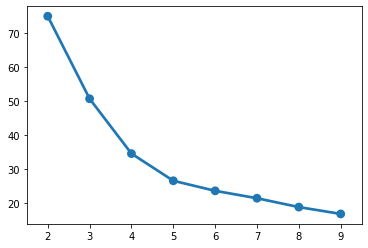

In [8]:
from kmodes.kmodes import KModes  
from kmodes.kprototypes import KPrototypes  
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
df_model = pd.read_csv('https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/df-customer-segmentation.csv')

# Melakukan Iterasi untuk Mendapatkan nilai Cost  
cost = {}  
for k in range(2,10):  
    kproto = KPrototypes (n_clusters = k,random_state=75)  
    kproto.fit_predict(df_model, categorical=[0,1,2])  
    cost [k]= kproto.cost_  
  
# Memvisualisasikan Elbow Plot  
sns.pointplot(x=list(cost.keys()), y=list(cost.values()))  
plt.show()


Membuat Model

Selanjutnya kamu dapat melakukan pembuatan model dengan jumlah kluster yang sudah di dapat pada tahap sebelumnya yaitu 5 dan menyimpan hasilnya sebagai pickle file.

Tugas:

Buatlah model Kprototypes dengan nilai k = 5 dan random state 75. Kemudian simpan hasilnya dalam bentuk pickle.

In [ ]:
import pickle
from kmodes.kmodes import Kmodes 
from kmodes.kprototypes import KPrototypes  
  
kproto = KPrototypes(n_clusters= 5, random_state = 75)  
kproto = kproto.fit(df_model, categorical=[0,1,2])  
  
#Save Model  
pickle.dump(kproto, open('cluster.pkl', 'wb'))  

Menggunakan Model

Tugas:

Tentukan cluster setiap pelanggan yang ada di dataset menggunakan model kproto yang sudah di buat sebelumnya. Kemudian gabungkan hasil prediksi tersebut dengan data awal (df) sehingga kita mendapatkan data pelanggan beserta nama cluster nya.

In [16]:
import pandas as pd
df = pd.read_csv("https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/customer_segments.txt", sep="\t") 
# Menentukan segmen tiap pelanggan    
clusters =  kproto.predict(df_model, categorical=[0,1,2])    
print('segmen pelanggan: {}\n'.format(clusters))    
    
# Menggabungkan data awal dan segmen pelanggan    
df_final = df.copy()    
df_final['cluster'] = clusters
print(df_final.head())   


segmen pelanggan: [8 3 5 5 6 2 8 5 2 2 5 5 8 8 1 2 2 5 6 3 6 5 2 6 1 5 6 0 5 0 4 7 4 1 0 6 2
 7 2 3 2 1 2 1 2 1 5 7 0 7]

  Customer_ID       Nama Pelanggan  ... NilaiBelanjaSetahun  cluster
0    CUST-001         Budi Anggara  ...             9497927        8
1    CUST-002     Shirley Ratuwati  ...             2722700        3
2    CUST-003         Agus Cahyono  ...             5286429        5
3    CUST-004     Antonius Winarta  ...             5204498        5
4    CUST-005  Ibu Sri Wahyuni, IR  ...            10615206        6

[5 rows x 8 columns]


Menampilkan Cluster Tiap Pelanggan

Tugas:

Tampilkan data pelanggan yang di kelompokkan berdasarkan nomor clusternya

In [17]:
# Menampilkan data pelanggan berdasarkan cluster nya  
for i in range (0,5):  
    print('\nPelanggan cluster: {}\n'.format(i))  
    print(df_final[df_final['cluster']== i])



Pelanggan cluster: 0

   Customer_ID   Nama Pelanggan  ... NilaiBelanjaSetahun  cluster
27    CUST-028    Adeline Huang  ...             6631680        0
29    CUST-030   Rosita Saragih  ...             5020976        0
34    CUST-035          Ida Ayu  ...             5962575        0
48    CUST-049  Josephine Wahab  ...             4992585        0

[4 rows x 8 columns]

Pelanggan cluster: 1

   Customer_ID    Nama Pelanggan  ... NilaiBelanjaSetahun  cluster
14    CUST-015  Shirley Ratuwati  ...            10365668        1
24    CUST-025    Julia Setiawan  ...            10721998        1
33    CUST-034    Deasy Arisandi  ...             9759822        1
41    CUST-042      Yuliana Wati  ...             9880607        1
43    CUST-044              Anna  ...             9339737        1
45    CUST-046      Elfira Surya  ...            10099807        1

[6 rows x 8 columns]

Pelanggan cluster: 2

   Customer_ID         Nama Pelanggan  ... NilaiBelanjaSetahun  cluster
5     CUST-006  


Visualisasi Hasil Clustering - Box Plot

Tugas:

Buatlah boxlplot untuk memvisualisasikan setiap variabel tiap pelanggan yang dibagi berdasarkan nama clusternya. 

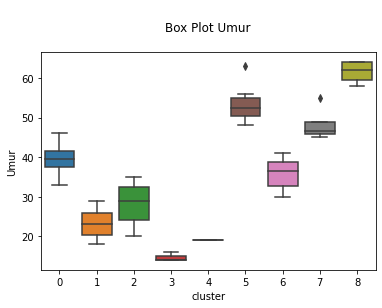

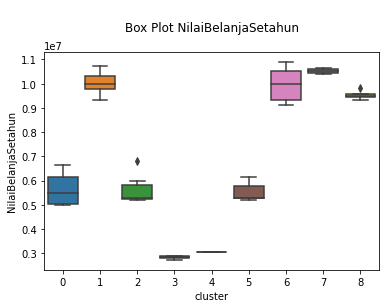

In [18]:
import matplotlib.pyplot as plt
# Data Numerical
kolom_numerik = ['Umur','NilaiBelanjaSetahun']  
  
for i in kolom_numerik:  
    plt.figure(figsize=(6,4))  
    ax = sns.boxplot(x = 'cluster',y = i, data = df_final)  
    plt. title('\nBox Plot {}\n'.format(i), fontsize=12)  
    plt.show() 


Visualisasi Hasil Clustering - Count Plot

Tugas:

Buatlah countplot untuk memvisualisasikan setiap variabel tiap pelanggan yang dibagi berdasarkan nama clusternya. 

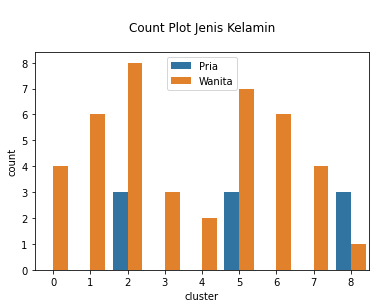

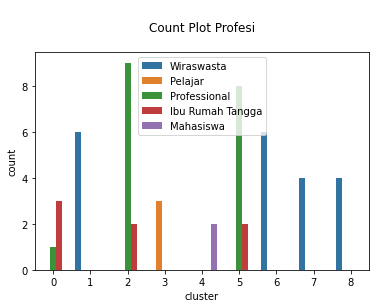

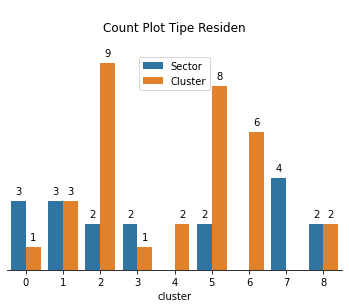

In [20]:
import matplotlib.pyplot as plt
# Data Kategorikal
kolom_categorical = ['Jenis Kelamin','Profesi','Tipe Residen']

for i in kolom_categorical:
    plt.figure(figsize=(6,4))
    ax = sns.countplot(data = df_final, x = 'cluster', hue = i )
    plt.title('\nCount Plot {}\n'.format(i), fontsize=12)
    ax.legend(loc="upper center")
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
    (p.get_x() + p.get_width() / 2., p.get_height()),
    ha = 'center',
    va = 'center',
    xytext = (0, 10),
    textcoords = 'offset points')

sns.despine(right=True,top = True, left = True)
ax.axes.yaxis.set_visible(False)
plt.show()

Menamakan Cluster

Tugas:

Tambahkan satu buah kolom dengan nama segmen. Kemudian isilah kolom ini dengan nama segmen dari tiap tiap pelanggan berdasarkan nilai cluster nya dan tampilkan lima data teratas.

In [21]:
# Mapping nama kolom  
df_final['segmen'] = df_final['cluster'].map({  
    0: 'Diamond Young Member',  
    1: 'Diamond Senior Member',  
    2: 'Silver Member',  
    3: 'Gold Young Member',  
    4: 'Gold Senior Member'  
})  

print(df_final.info())
print(df_final.head())  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Customer_ID          50 non-null     object
 1   Nama Pelanggan       50 non-null     object
 2   Jenis Kelamin        50 non-null     object
 3   Umur                 50 non-null     int64 
 4   Profesi              50 non-null     object
 5   Tipe Residen         50 non-null     object
 6   NilaiBelanjaSetahun  50 non-null     int64 
 7   cluster              50 non-null     uint16
 8   segmen               26 non-null     object
dtypes: int64(2), object(6), uint16(1)
memory usage: 3.3+ KB
None
  Customer_ID       Nama Pelanggan  ... cluster             segmen
0    CUST-001         Budi Anggara  ...       8                NaN
1    CUST-002     Shirley Ratuwati  ...       3  Gold Young Member
2    CUST-003         Agus Cahyono  ...       5                NaN
3    CUST-004     Antoniu

Mempersiapkan Data Baru

Tugas:

Buatlah satu dataframe yang berisi informasi pelanggan dan tampilkan hasilnya.

In [22]:
# Data Baru  
data = [{  
    'Customer_ID': 'CUST-100' ,  
    'Nama Pelanggan': 'Joko' ,  
    'Jenis Kelamin': 'Pria',  
    'Umur': 45,  
    'Profesi': 'Wiraswasta',  
    'Tipe Residen': 'Cluster' ,  
    'NilaiBelanjaSetahun': 8230000  
      
}]  
  
# Membuat Data Frame  
new_df = pd.DataFrame(data)  
  
# Melihat Data  
print(new_df)  

  Customer_ID Nama Pelanggan  ... Tipe Residen  NilaiBelanjaSetahun
0    CUST-100           Joko  ...      Cluster              8230000

[1 rows x 7 columns]


Membuat Fungsi Data Pemrosesan


In [27]:
def data_preprocess(data):
    # Konversi Kategorikal data
    kolom_kategorikal = ['Jenis Kelamin','Profesi','Tipe Residen']

    df_encode = data[kolom_kategorikal].copy()

    ## Jenis Kelamin
    df_encode['Jenis Kelamin'] = df_encode['Jenis Kelamin'].map({
    'Pria': 0,
    'Wanita' : 1
    })

    ## Profesi
    df_encode['Profesi'] = df_encode['Profesi'].map({
    'Ibu Rumah Tangga': 0,
    'Mahasiswa' : 1,
    'Pelajar': 2,
    'Professional': 3,
    'Wiraswasta': 4
    })

    ## Tipe Residen
    df_encode['Tipe Residen'] = df_encode['Tipe Residen'].map({
    'Cluster': 0,
    'Sector' : 1
    })

    # Standardisasi Numerical Data
    kolom_numerik = ['Umur','NilaiBelanjaSetahun']
    df_std = data[kolom_numerik].copy()

    ## Standardisasi Kolom Umur
    df_std['Umur'] = (df_std['Umur'] - 37.5)/14.7

    ## Standardisasi Kolom Nilai Belanja Setahun
    df_std['NilaiBelanjaSetahun'] = (df_std['NilaiBelanjaSetahun'] - 7069874.8)/2590619.0

    # Menggabungkan Kategorikal dan numerikal data
    df_model = df_encode.merge(df_std, left_index = True,
    right_index=True, how = 'left')

    return df_model

# Menjalankan fungsi
new_df_model = data_preprocess(new_df)

print(new_df_model)

   Jenis Kelamin  Profesi  Tipe Residen      Umur  NilaiBelanjaSetahun
0              0        4             0  0.510204             0.447818


Memanggil Model dan Melakukan Prediksi

Tugas:

Buatlah fungsi yang bisa di gunakan untuk memanggil model dan melakukan prediksi serta menyimpan hasilnya nya kedalam satu dataframe. Jika berhasil di panggil, kita akan mendapatkan cluster dari data yang kita masukan.

In [ ]:
def modelling (data):  
      
    # Memanggil Model  
    kpoto = pickle.load(open('cluster.pkl', 'rb'))  
      
    # Melakukan Prediksi  
    clusters = kpoto.predict(data,categorical=[0,1,2])  
      
    return clusters  
  
# Menjalankan Fungsi  
clusters = modelling(new_df_model)  
  
print(clusters)

Menamakan Segmen

Tugas:

Disini kamu harus membuat fungsi yang bernama menamakan_segmen dengan data asli dan clusters sebagai inputnya.

In [ ]:
def menamakan_segmen (data_asli, clusters):

    # Menggabungkan cluster dan data asli
    final_df = data_asli.copy()
    final_df['cluster'] = clusters

    # Menamakan segmen
    final_df['segmen'] = final_df['cluster'].map({
    0: 'Diamond Young Member',
    1: 'Diamond Senior Member',
    2: 'Silver Students',
    3: 'Gold Young Member',
    4: 'Gold Senior Member'
    })

    return final_df

# Menjalankan Fungsi
new_final_df = menamakan_segmen(new_df,clusters)

print(new_final_df)